In [2]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

C:\Users\alida\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\alida\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\alida\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\alida\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [3]:
DIR = r'D:\PROJECTS\Kaggle facial recog\face_detection\dataset'
CATEGORY = ['with_mask','without_mask']

In [5]:
data =[] # here we are gonna place all the images array
label = [ ] # here we corresponding images of with mask and without mask


In [1]:
for category in CATEGORY:
    path = os.path.join(DIR,category)
    #print (path)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image= load_img(img_path,target_size=(224,224))
        print(image)
        image=img_to_array(image)
        image=preprocess_input(image)
        print(image)
        data.append(image)
        label.append(category)
        

NameError: name 'CATEGORY' is not defined

In [2]:
print(data)

NameError: name 'data' is not defined

In [3]:
print(label)

NameError: name 'label' is not defined

In [ ]:
lb = LabelBinarizer()
label=lb.fit_transform(label)
label = to_categorical(label)
data = np.array(data,dtype='float32')




In [8]:
(train_x,test_x,train_y,test_y) =train_test_split(data,label,test_size=0.30,stratify=label,random_state=42)

In [9]:
aug = ImageDataGenerator(
      rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [10]:
baseModel = MobileNetV2(weights='imagenet',include_top=False,input_tensor= Input(shape=(224,224,3)))

C:\Users\alida\anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False



In [12]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [13]:
H = model.fit(
aug.flow(train_x, train_y, batch_size=BS),
steps_per_epoch=len(train_x) // BS,
validation_data=(test_x, test_y),
validation_steps=len(test_x) // BS,
epochs=EPOCHS)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
83/83 [==============================] - 1705s 21s/step - loss: 0.6267 - acc: 0.6684 - val_loss: 0.4633 - val_acc: 0.7878
Epoch 2/20
83/83 [==============================] - 1398s 17s/step - loss: 0.3613 - acc: 0.8442 - val_loss: 0.3819 - val_acc: 0.8383
Epoch 3/20
83/83 [==============================] - 1576s 19s/step - loss: 0.2653 - acc: 0.8982 - val_loss: 0.3693 - val_acc: 0.8443
Epoch 4/20
83/83 [==============================] - 1294s 16s/step - loss: 0.2273 - acc: 0.9083 - val_loss: 0.3414 - val_acc: 0.8583
Epoch 5/20
83/83 [==============================] - 1342s 16s/step - loss: 0.2040 - acc: 0.9261 - val_loss: 0.3490 - val_acc: 0.8635
Epoch 6/20
83/83 [==============================] - 1752s 21s/step - loss: 0.1787 - acc: 0.9344 - val_loss: 0.2989 - val_acc: 0.8835
Epoch 7/20
83/83 [==============================] - 1287s 16s/step - loss: 0.1685 - acc: 0.9389 - val_loss: 

In [17]:
print("[INFO] evaluating network...")
predIdxs = model.predict(test_x, batch_size=BS)


[INFO] evaluating network...


In [18]:
predIdxs = np.argmax(predIdxs, axis=1)

In [20]:
print(classification_report(test_y.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("Covid-19.model", save_format="h5")


              precision    recall  f1-score   support

   with_mask       0.98      0.86      0.92       575
without_mask       0.87      0.99      0.93       575

    accuracy                           0.92      1150
   macro avg       0.93      0.92      0.92      1150
weighted avg       0.93      0.92      0.92      1150

[INFO] saving mask detector model...


KeyError: 'accuracy'

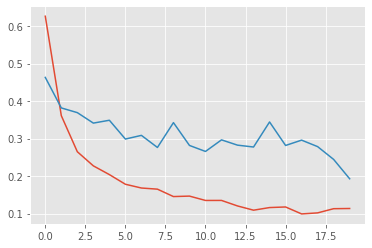

In [21]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")